# Carregamento da base de dados e importações

In [57]:
!pip install category_encoders

In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import os

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from category_encoders import TargetEncoder, CatBoostEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV
)

In [59]:
# Carrega os datasets
order_items = pd.read_csv("/content/drive/MyDrive/Universidade de dados/Semana 2: Introdução a Machine Learning, Lidando com Grandes Datasets no Pandas, Dicas de Pandas e Leituras Recomendadas/Dataset semana 2/olist_order_items_dataset.csv")
orders = pd.read_csv("/content/drive/MyDrive/Universidade de dados/Semana 2: Introdução a Machine Learning, Lidando com Grandes Datasets no Pandas, Dicas de Pandas e Leituras Recomendadas/Dataset semana 2/olist_orders_dataset.csv")
order_payments = pd.read_csv("/content/drive/MyDrive/Universidade de dados/Semana 2: Introdução a Machine Learning, Lidando com Grandes Datasets no Pandas, Dicas de Pandas e Leituras Recomendadas/Dataset semana 2/olist_order_payments_dataset.csv")
products = pd.read_csv("/content/drive/MyDrive/Universidade de dados/Semana 2: Introdução a Machine Learning, Lidando com Grandes Datasets no Pandas, Dicas de Pandas e Leituras Recomendadas/Dataset semana 2/olist_products_dataset.csv")
customers = pd.read_csv("/content/drive/MyDrive/Universidade de dados/Semana 2: Introdução a Machine Learning, Lidando com Grandes Datasets no Pandas, Dicas de Pandas e Leituras Recomendadas/Dataset semana 2/olist_customers_dataset.csv")
sellers = pd.read_csv("/content/drive/MyDrive/Universidade de dados/Semana 2: Introdução a Machine Learning, Lidando com Grandes Datasets no Pandas, Dicas de Pandas e Leituras Recomendadas/Dataset semana 2/olist_sellers_dataset.csv")
product_category_translation = pd.read_csv("/content/drive/MyDrive/Universidade de dados/Semana 2: Introdução a Machine Learning, Lidando com Grandes Datasets no Pandas, Dicas de Pandas e Leituras Recomendadas/Dataset semana 2/product_category_name_translation.csv")

# fazendo inner joins
order_data = order_items.merge(orders, on='order_id') \
                    .merge(order_payments, on=['order_id']) \
                    .merge(products, on='product_id') \
                    .merge(customers, on='customer_id') \
                    .merge(sellers, on='seller_id') \
                    .merge(product_category_translation, on='product_category_name')

# Dataset final
order_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,9.0,14.0,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,9.0,14.0,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,9.0,14.0,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,9.0,14.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277,volta redonda,SP,cool_stuff


In [60]:
order_data.shape

(115878, 34)

In [61]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115878 entries, 0 to 115877
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115878 non-null  object 
 1   order_item_id                  115878 non-null  int64  
 2   product_id                     115878 non-null  object 
 3   seller_id                      115878 non-null  object 
 4   shipping_limit_date            115878 non-null  object 
 5   price                          115878 non-null  float64
 6   freight_value                  115878 non-null  float64
 7   customer_id                    115878 non-null  object 
 8   order_status                   115878 non-null  object 
 9   order_purchase_timestamp       115878 non-null  object 
 10  order_approved_at              115864 non-null  object 
 11  order_delivered_carrier_date   114673 non-null  object 
 12  order_delivered_customer_date 

In [62]:
# Excluindo informações irrelevantes
order_data = order_data.drop(columns=['seller_id', 'freight_value'])

vamos presumir que o frete nao impacta na precificação dos produtos, podendo fazer testes posteriormente


In [63]:
order_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'shipping_limit_date',
       'price', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

In [64]:
# as colunas que importam na precificação são aquelas que se referem ao produto! Sendo elas:
order_data = order_data[[ 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g', # tamanho do nome e tamanho da descrição excluir depois
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_state',
      'price']]

In [65]:
# Ecluindo missing
order_data = order_data.dropna()
order_data.shape

(115877, 10)

In [66]:
order_data.shape

(115877, 10)

In [67]:
order_data.head()

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_state,price
0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,SP,58.9
1,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,SP,55.9
2,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,SP,64.9
3,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,SP,58.9
4,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,SP,58.9


# Outliers

Vamos analisar os outliers para ver se temos que remove-los

Nesse caso, talvez não seja ideal remover, uma vez que é importante para o modelo entender os casos no qual o preço é muito alto(é importante a existencia dos preços altos para um ecommerce, é uma info muito importante para simplemente remove-las), não é apensas dados sujos. Mas vamos verificar para entender melhor

<Axes: ylabel='price'>

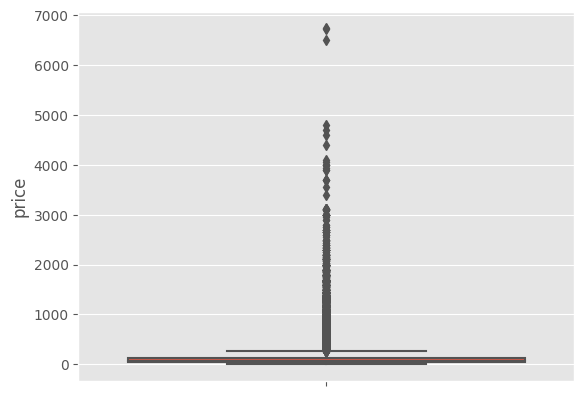

In [68]:
# Verificando outlers de preço
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

sns.boxplot(y='price', data=order_data)

In [69]:
order_data.price.describe()

count    115877.000000
mean        120.909070
std         184.140924
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

<Axes: ylabel='product_weight_g'>

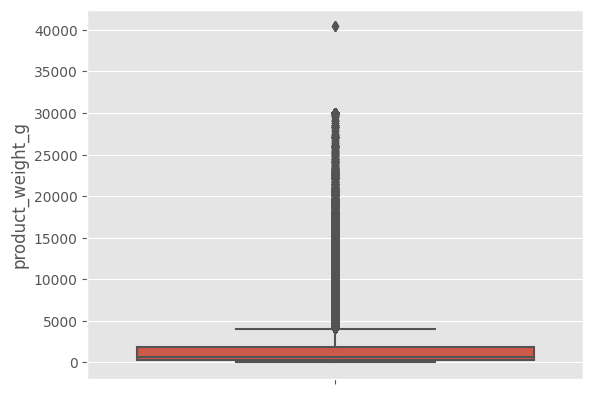

In [70]:
sns.boxplot(y='product_weight_g', data=order_data)

Ambos tem muito outliers, sera que eles tem uma relação?

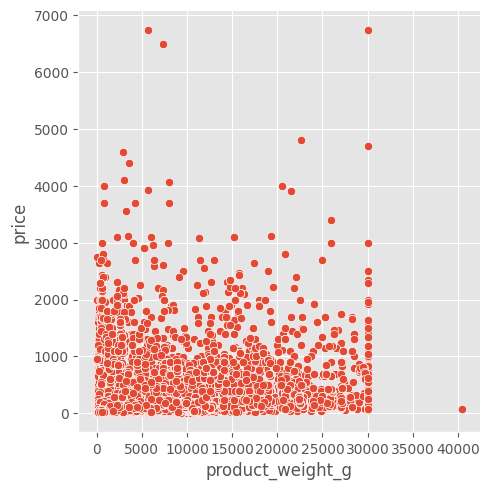

In [71]:
sns.relplot(x='product_weight_g', y='price', data=order_data)

<ipython-input-72-b372e982126f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = order_data.corr()


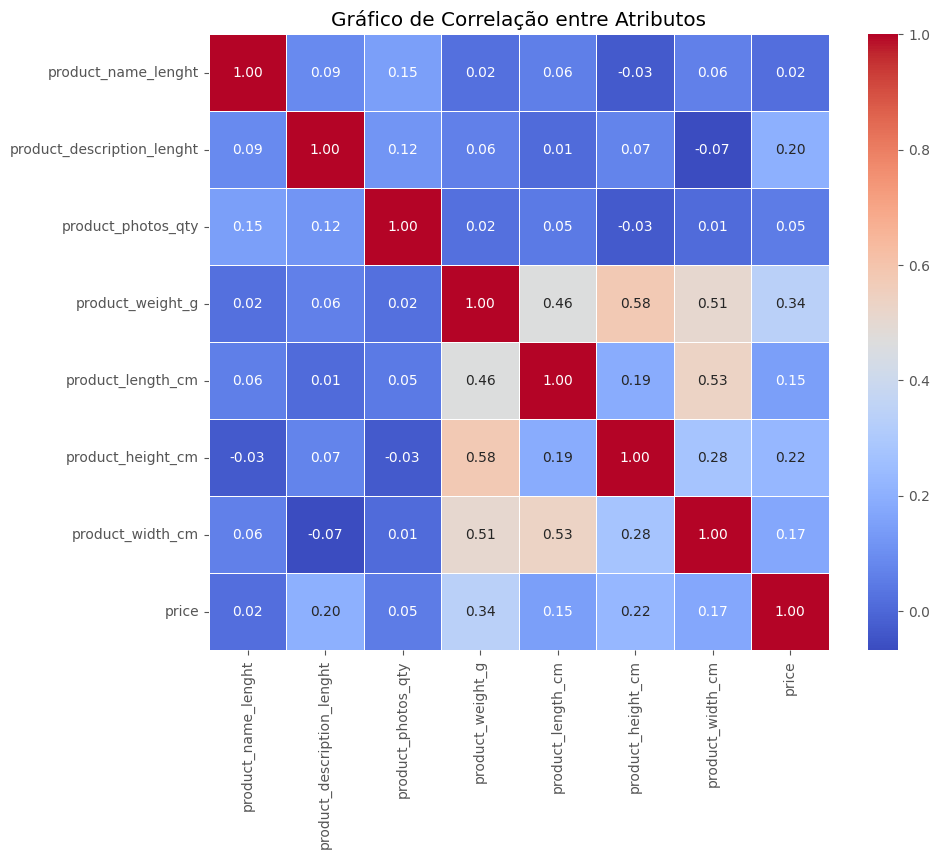

In [72]:
correlation_matrix = order_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Gráfico de Correlação entre Atributos")
plt.show()

Não tem nenhuma correlação muito forte com preço

A maioria das features aparenta ter muitos outliers, entao melhor deixar sem excluir

In [73]:
# Testando excluir os outliers 5% maiores e menores
outliers = order_data[(order_data['price'] < order_data['price'].quantile(0.05)) | (order_data['price'] > order_data['price'].quantile(0.95))]

outliers.shape[0] / order_data.shape[0]

0.09934672109219259

Quase 10% dos dados são considerados outliers

# Precificação com machine learning

In [74]:
order_data.columns

Index(['product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_state', 'price'],
      dtype='object')

In [75]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115877 entries, 0 to 115877
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_category_name       115877 non-null  object 
 1   product_name_lenght         115877 non-null  float64
 2   product_description_lenght  115877 non-null  float64
 3   product_photos_qty          115877 non-null  float64
 4   product_weight_g            115877 non-null  float64
 5   product_length_cm           115877 non-null  float64
 6   product_height_cm           115877 non-null  float64
 7   product_width_cm            115877 non-null  float64
 8   seller_state                115877 non-null  object 
 9   price                       115877 non-null  float64
dtypes: float64(8), object(2)
memory usage: 13.8+ MB


In [76]:
features = ['product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_state']

target = 'price'

In [111]:
X = order_data[features]
y = order_data[target]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
X_train.shape, y_train.shape

((92701, 9), (92701,))

In [114]:
numerical_features = ['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']
categorical_features = ['product_category_name', 'seller_state']

## 1° tentativa

In [81]:
numerical_pipe = Pipeline(steps=[ # Já tratamos os missing
    ('scaler', StandardScaler())
    # ('poly', polenomialfeaturs())
])

categorical_pipe = Pipeline(steps=[
    ('encoder', TargetEncoder())
])

preprocessamento = ColumnTransformer(transformers=[
    ('numerical', numerical_pipe, numerical_features),
    ('categorical', categorical_pipe, categorical_features)
]) # Poderiamos usar apenas o preprocessamento com fit_transoform(X_train, y_train)

xgb = XGBRegressor()

pipe = Pipeline(steps=[
    ('preprocessamento', preprocessamento),
    ('modelagem', xgb)
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessamento',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'product_weight_g',
                                                   'product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder())]),
                                                  ['product...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [82]:
y_pred = pipe.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

MAE: 43.684319726295726
MSE: 13036.227373704842
RMSE: 114.1762995271122


In [83]:
y_test.mean()

120.84522048671039

Olhando pra media do produto, percebemo que gira em torno de 120 e nosso erro medio foi de 43, ou seja, um erro consideravelmente alto

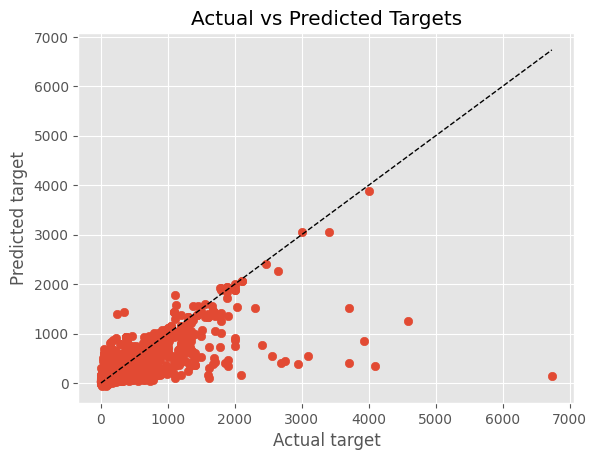

In [84]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1) # Plotando a linha que mostra os dados reais
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Actual vs Predicted Targets')
plt.show()

In [85]:
# Testando validação cruzada para confirmar se nao ta dando overfitting
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error') # A gente pode usar pip como um modelo
scores

array([-13177.80685167, -10712.39386514, -12169.04711468, -12205.60970731,
       -12270.61206567])

Percebmos que esta bem constante com pouca variação de erro, então nao estamos tendo problemas com overfitting

## 2° Tentativa: Param_grid

In [86]:
param_grid = {
    'modelagem__learning_rate': np.linspace(start=0.001, stop=0.3, num=10), # Tem que botar o nome que foi declarado no pipeline
    'modelagem__max_depth': [3, 5, 7, 10, 12, 15],
    'modelagem__n_estimators': [100, 200, 300, 500, 1000]
}

random_search = RandomizedSearchCV(estimator=pipe,
                                   param_distributions=param_grid, cv=5, n_iter=3)
random_search.fit(X_train, y_train)

print("Melhores hiperparâmetros: ", random_search.best_params_)

Melhores hiperparâmetros:  {'modelagem__n_estimators': 300, 'modelagem__max_depth': 12, 'modelagem__learning_rate': 0.20033333333333334}


In [87]:
numerical_pipe = Pipeline(steps=[ # Já tratamos os missing
    ('scaler', StandardScaler())
    # ('poly', polenomialfeaturs())
])

categorical_pipe = Pipeline(steps=[
    ('encoder', TargetEncoder())
])

preprocessamento = ColumnTransformer(transformers=[
    ('numerical', numerical_pipe, numerical_features),
    ('categorical', categorical_pipe, categorical_features)
]) # Poderiamos usar apenas o preprocessamento com fit_transoform(X_train, y_train)

parametros = {'modelagem__n_estimators': 500, 'modelagem__max_depth': 12, 'modelagem__learning_rate': 0.1671111111111111}
xgb = XGBRegressor(**parametros)

pipe = Pipeline(steps=[
    ('preprocessamento', preprocessamento),
    ('modelagem', xgb)
])

pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:24:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "modelagem__learning_rate", "modelagem__max_depth", "modelagem__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessamento',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'product_weight_g',
                                                   'product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder())]),
                                                  ['product...
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              modelagem__learning_rate=0.1671111111111111,
                              modelagem__max_depth=12,
                              modelagem__n_estimators=500,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, ...))])

In [88]:
# Olhando mais parametros para serem otimizados
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessamento', 'modelagem', 'preprocessamento__n_jobs', 'preprocessamento__remainder', 'preprocessamento__sparse_threshold', 'preprocessamento__transformer_weights', 'preprocessamento__transformers', 'preprocessamento__verbose', 'preprocessamento__verbose_feature_names_out', 'preprocessamento__numerical', 'preprocessamento__categorical', 'preprocessamento__numerical__memory', 'preprocessamento__numerical__steps', 'preprocessamento__numerical__verbose', 'preprocessamento__numerical__scaler', 'preprocessamento__numerical__scaler__copy', 'preprocessamento__numerical__scaler__with_mean', 'preprocessamento__numerical__scaler__with_std', 'preprocessamento__categorical__memory', 'preprocessamento__categorical__steps', 'preprocessamento__categorical__verbose', 'preprocessamento__categorical__encoder', 'preprocessamento__categorical__encoder__cols', 'preprocessamento__categorical__encoder__drop_invariant', 'preprocessamento__categorical__encoder__ha

In [89]:
y_pred = pipe.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

MAE: 43.684319726295726
MSE: 13036.227373704842
RMSE: 114.1762995271122


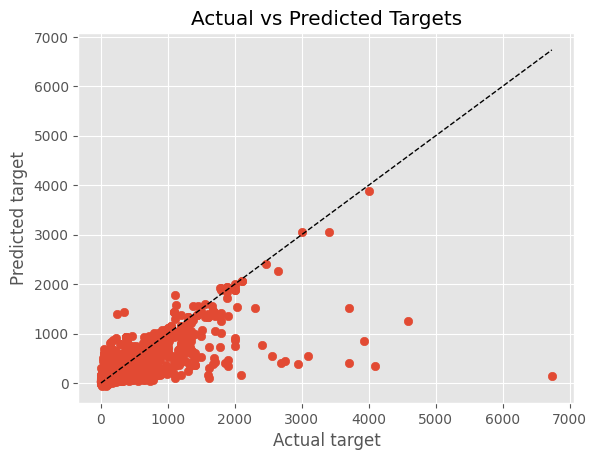

In [90]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1) # Plotando a linha que mostra os dados reais
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Actual vs Predicted Targets')
plt.show()

## 3° Tentativa: OutLiers

In [91]:
!pip install feature-engine

In [115]:
# Vamos adicionar volume como uma feature(multiplicando altura altura e comprimento)
X_train["volume"] = X_train["product_length_cm"]* X_train["product_height_cm"]* X_train["product_width_cm"]
X_test["volume"] = X_test["product_length_cm"]* X_test["product_height_cm"]* X_test["product_width_cm"]

numerical_features.append("volume") # Adicionando nas nossas features numericas

In [93]:
# Vamos concatenar para analisar os outliers do preco
train = pd.concat([X_train, y_train], axis=1)

# Calcularemos o z_socre para saber quais preços sao considerados outliers
z_scores = np.abs((train['price']-train['price'].mean())/train['price'].std())

# Entre -3 e 3 é um valor dentro da curva normal(um valor aceitavel)
outlier_threshold = 3

train_wo_outliers = train[z_scores <= outlier_threshold] # So vamos pegar aqueles registros com Z score menor que 3
train.shape, train_wo_outliers.shape

((92701, 11), (91049, 11))

In [94]:
train_wo_outliers.columns

Index(['product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_state', 'volume', 'price'],
      dtype='object')

In [95]:
# Vamos dividir em X e y de novo
X_train_wo_outliers = train_wo_outliers[['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category_name',
       'seller_state', 'volume']]
y_train_wo_outliers = train_wo_outliers['price']

In [96]:
numerical_pipe = Pipeline(steps=[ # Já tratamos os missing
    ('scaler', StandardScaler())
    # ('poly', polenomialfeaturs())
])

categorical_pipe = Pipeline(steps=[
    ('encoder', TargetEncoder())
])

preprocessamento = ColumnTransformer(transformers=[
    ('numerical', numerical_pipe, numerical_features),
    ('categorical', categorical_pipe, categorical_features)
]) # Poderiamos usar apenas o preprocessamento com fit_transoform(X_train, y_train)

xgb = XGBRegressor()

pipe = Pipeline(steps=[
    ('preprocessamento', preprocessamento),
    ('modelagem', xgb)
])

pipe.fit(X_train_wo_outliers, y_train_wo_outliers)

Pipeline(steps=[('preprocessamento',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'product_weight_g',
                                                   'product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm',
                                                   'volume']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder())]),...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [97]:
y_pred = pipe.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

MAE: 44.57870298804272
MSE: 22231.438887992816
RMSE: 149.10210893207653


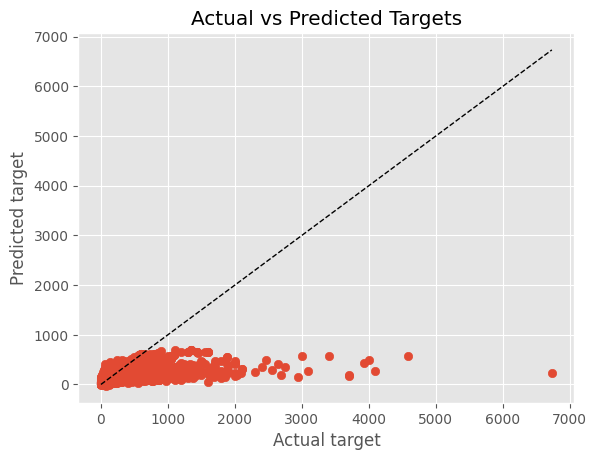

In [98]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1) # Plotando a linha que mostra os dados reais
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Actual vs Predicted Targets')
plt.show()

Sem os outliers o modelo nao se adaptou bem, prevendo um valor muito baixo para todos os registros. Isso acontece pois nao demos nenhum registro de valor alto para o modelo, entao logicamente ele nao tem como prever os registros com um valor considferavelmente alto

**Melhorias para o futuro:**
- Transformação polinomial
- Tratar features assimetricas(transformações logatmicas, arco seno)
- Alem das melhorias no modelo, tambem é necessario estudar elasticidade para entender como -- a partir do preço dado pelo medelo -- podemos aumentar ou diminuir o preço passado ao consumidor


## 4° Tentativa: Tratar features assimetricas

Como nossos dados estão muito desbalanceados, com muitos outliers, pode ser interessante aplicar um tratamento de assimetrica para as features que se distancearem muito de uma curva normal

### log transformation

In [99]:
# Quanto mais proximo de 0, mais perto de uma curva normal
order_data.skew().sort_values(ascending=False)

<ipython-input-99-fdfe9566e755>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  order_data.skew().sort_values(ascending=False)


price                         7.856228
product_weight_g              3.579413
product_height_cm             2.240846
product_description_lenght    2.010151
product_photos_qty            1.906226
product_length_cm             1.745045
product_width_cm              1.712218
product_name_lenght          -0.905422
dtype: float64

In [101]:
X_train_log = X_train
y_train_log = np.log1p(y_train)
X_train_log['product_weight_g'] = np.log1p(X_train['product_weight_g'])

In [102]:
y_train_log.describe()

count    92701.000000
mean         4.337279
std          0.909657
min          0.615186
25%          3.711130
50%          4.329417
75%          4.911919
max          8.814330
Name: price, dtype: float64

In [104]:
numerical_pipe = Pipeline(steps=[ # Já tratamos os missing
    ('scaler', StandardScaler())
    # ('poly', polenomialfeaturs())
])

categorical_pipe = Pipeline(steps=[
    ('encoder', TargetEncoder())
])

preprocessamento = ColumnTransformer(transformers=[
    ('numerical', numerical_pipe, numerical_features),
    ('categorical', categorical_pipe, categorical_features)
]) # Poderiamos usar apenas o preprocessamento com fit_transoform(X_train, y_train)

xgb = XGBRegressor()

pipe = Pipeline(steps=[
    ('preprocessamento', preprocessamento),
    ('modelagem', xgb)
])

pipe.fit(X_train_log, y_train_log)

Pipeline(steps=[('preprocessamento',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'product_weight_g',
                                                   'product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm',
                                                   'volume']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder())]),...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [105]:
y_pred = pipe.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

MAE: 115.44023626840399
MSE: 48479.949859685825
RMSE: 220.18162925113853


### Normalize (min-max) + Polynomial features

Polinomial features: Essa técnica é útil quando as **relações entre as features originais e a variável alvo (ou entre as features em si) não são lineares**. Ao introduzir combinações polinomiais das features originais, é possível capturar relações mais complexas nos dados, permitindo que modelos de aprendizado de máquina lineares se adaptem melhor a padrões não lineares nos dados. É importante ressaltar que, via de regra, uma **correlação baixa implica em uma falta de linearidade entre duas features** -Mas nem sempre esse SE ENTÃO É VERDADE - . Então, **quando tivermos uma baixa Correlação entre as features é o target, é importante testar o comportamento do modelo com a aplicação das polinomial features**.


Ele basicamente vai criar colunas com base na interação entre as colunas  e tambem vai criar novas colunas baseadas nas colunas elevado a 2. No exemplo abaixo temos as relaçoes criadas a partir de interações e entre elas, as colunas elevadas a 2. Sendo ela de grau 2

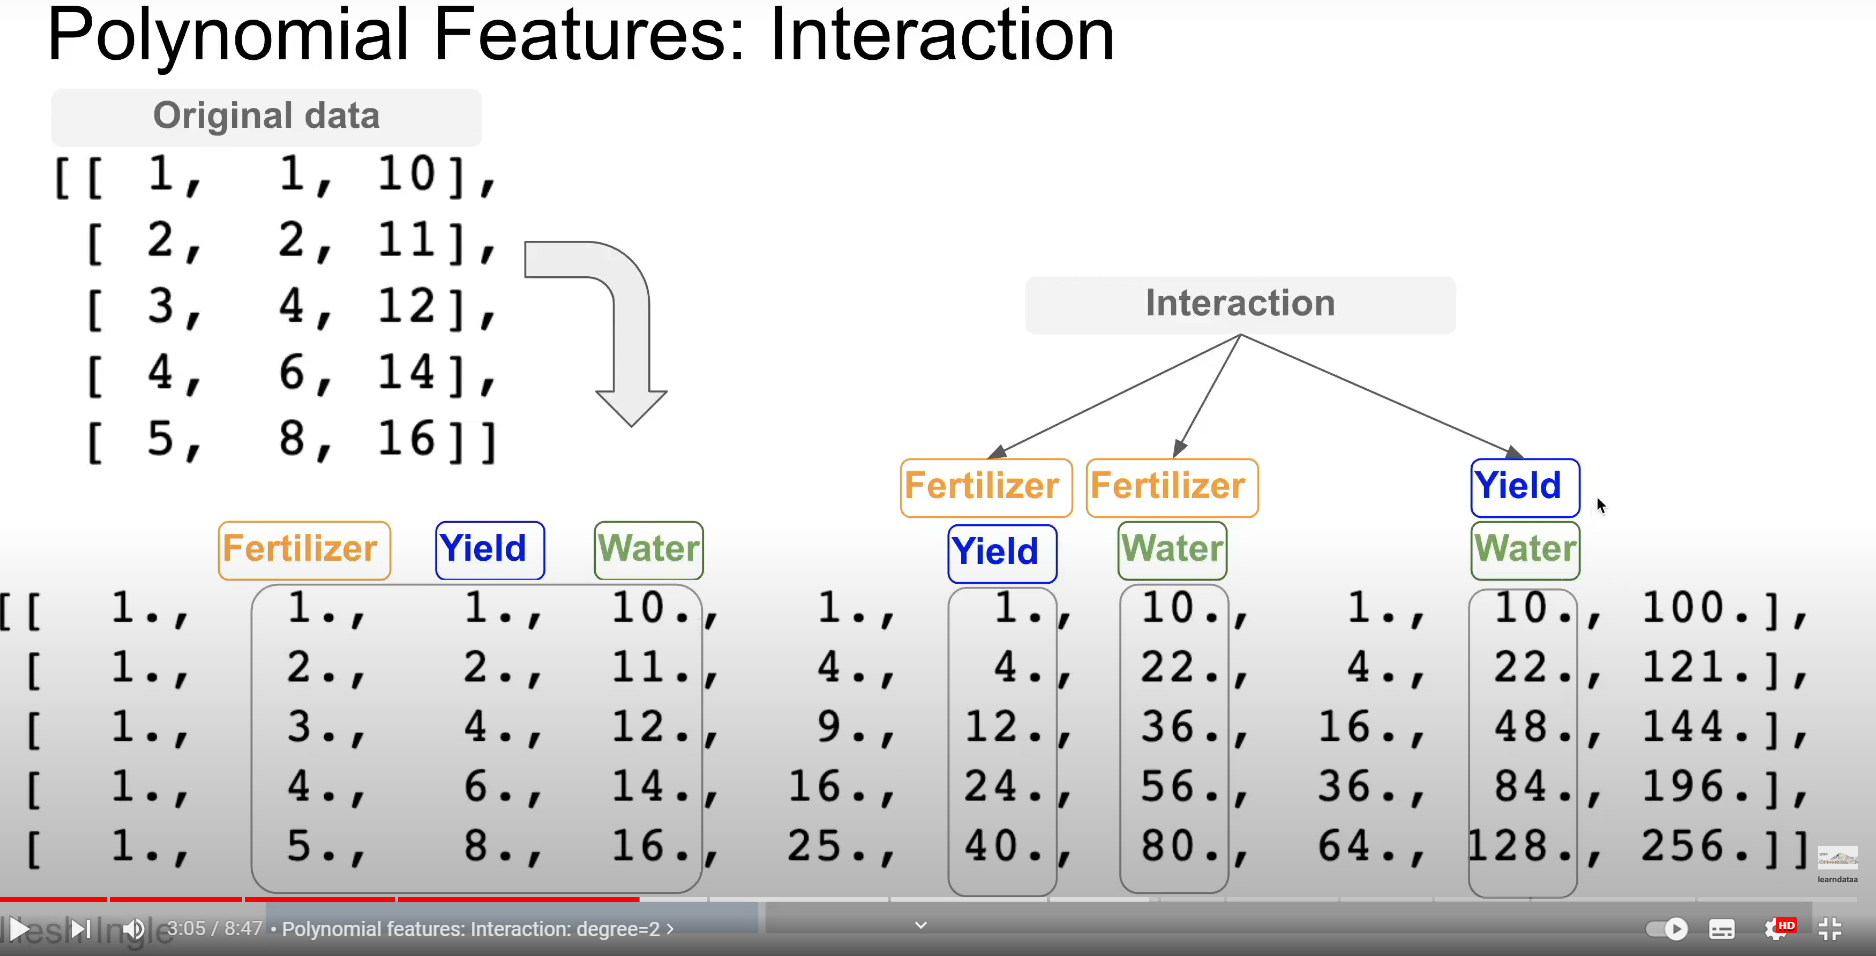

Se fosse de grau 3, teriamos uma adição de interações das 3 colunas e adicioando alguns elavdos a 2

In [122]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

numerical_pipe = Pipeline(steps=[ # Já tratamos os missing
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree = 5, interaction_only=False))
])

categorical_pipe = Pipeline(steps=[
    ('encoder', TargetEncoder())
])

preprocessamento = ColumnTransformer(transformers=[
    ('numerical', numerical_pipe, numerical_features),
    ('categorical', categorical_pipe, categorical_features)
]) # Poderiamos usar apenas o preprocessamento com fit_transoform(X_train, y_train)

xgb = XGBRegressor()

pipe = Pipeline(steps=[
    ('preprocessamento', preprocessamento),
    ('modelagem', xgb)
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessamento',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5))]),
                                                  ['product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'product_weight_g',
                                                   'product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm',
                                                   'volume']),
                                                 ('categorical',
                                                  Pipeline(s...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [123]:
y_pred = pipe.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)**0.5}")

MAE: 38.504015823014754
MSE: 12176.233648363044
RMSE: 110.34597250630874


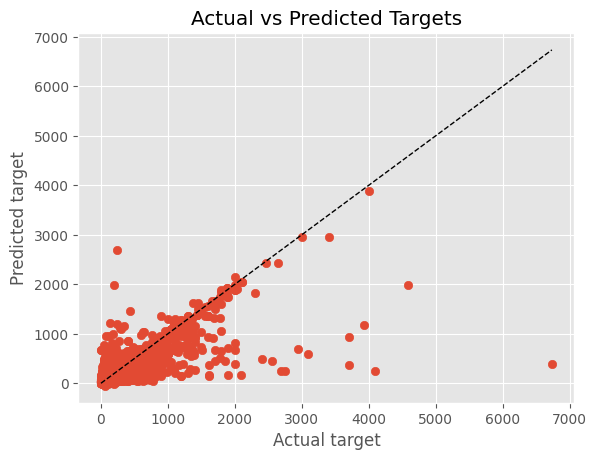

In [124]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1) # Plotando a linha que mostra os dados reais
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Actual vs Predicted Targets')
plt.show()